# Task 3 - cell type labeling

In [5]:
import scanpy as sc
import pandas as pd
import numpy as np
import scipy.stats as stats

from statsmodels.stats.multitest import fdrcorrection

In [11]:
adata = sc.read('task2_leiden.h5ad')

In [7]:
labels = pd.read_csv('annotation_levels.csv')

### Feature maps

In [12]:
cols = []
for c in adata.obs.leiden.drop_duplicates():

    adata.obs[f'is_{c}'] = (adata.obs['leiden'] == c).astype('category')
    cols.append(f'is_{c}')

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.

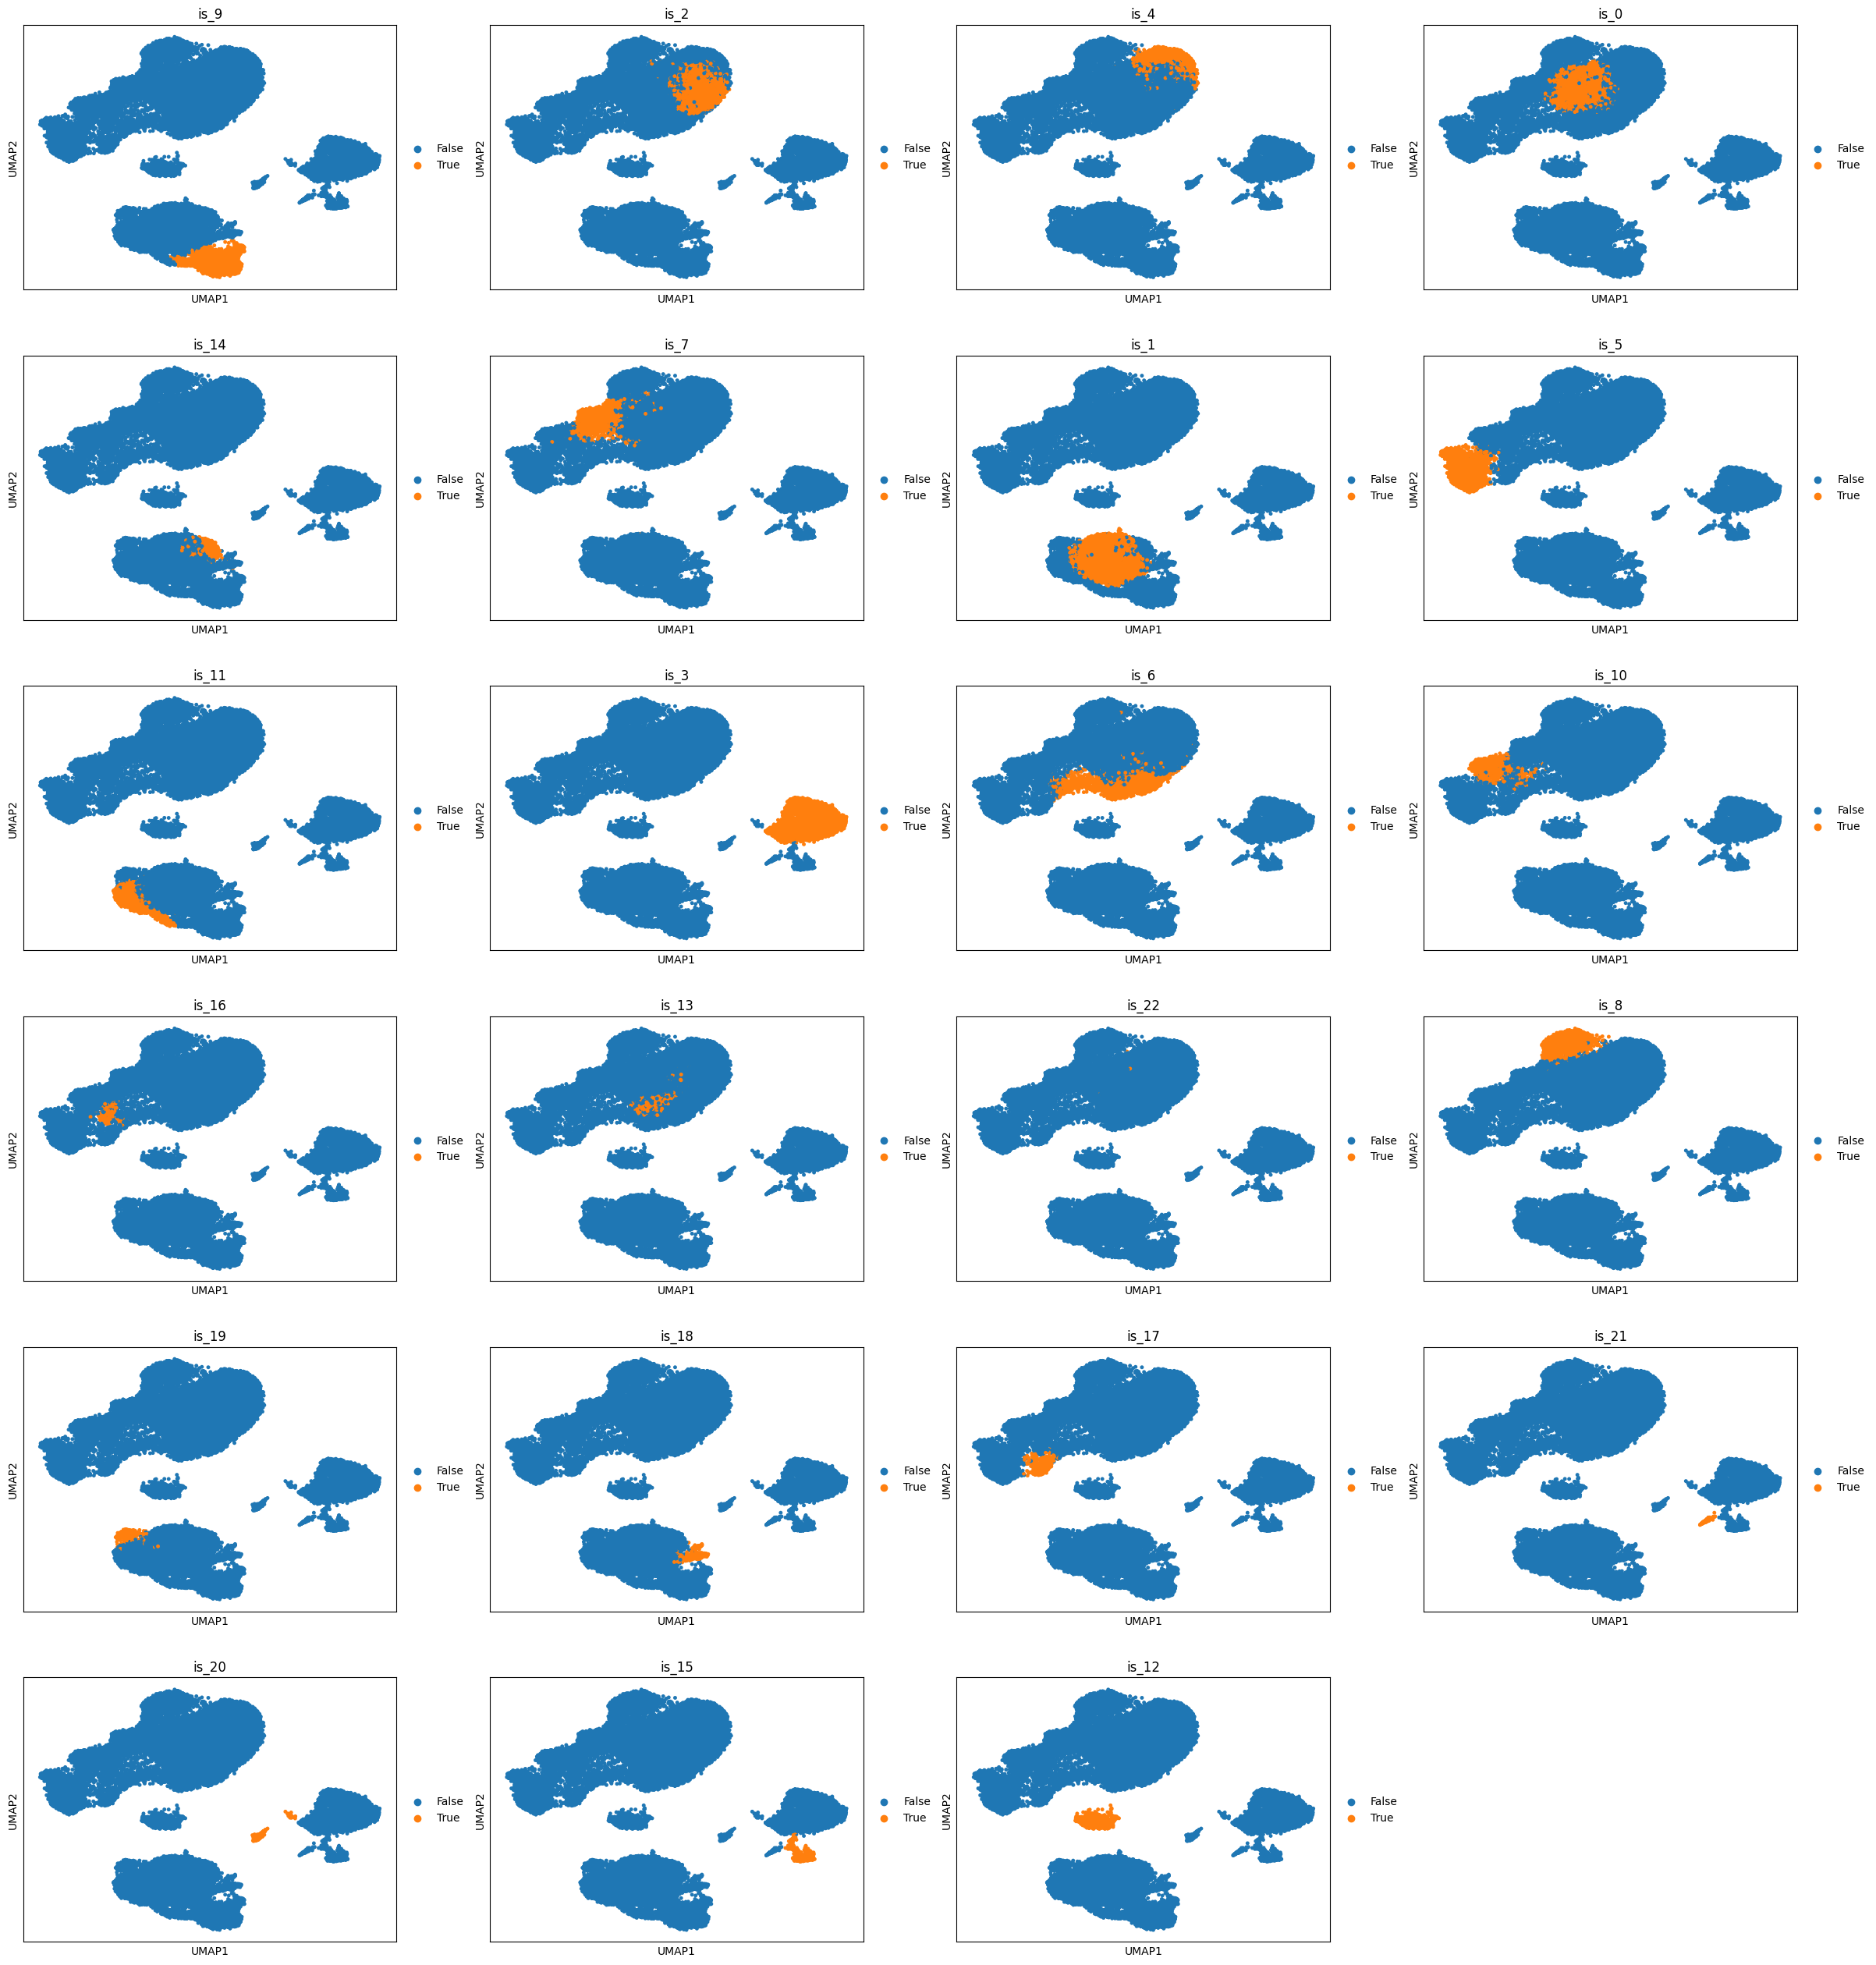

In [48]:
sc.pl.umap(adata, color=cols, s=50)

In [37]:
'TCRG' in adata.raw.var.index

False

In [46]:
markers = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP', 'TRAV1-2', 'TRDV2', 'TRGV9', 'TRDC', 'TRDV1']

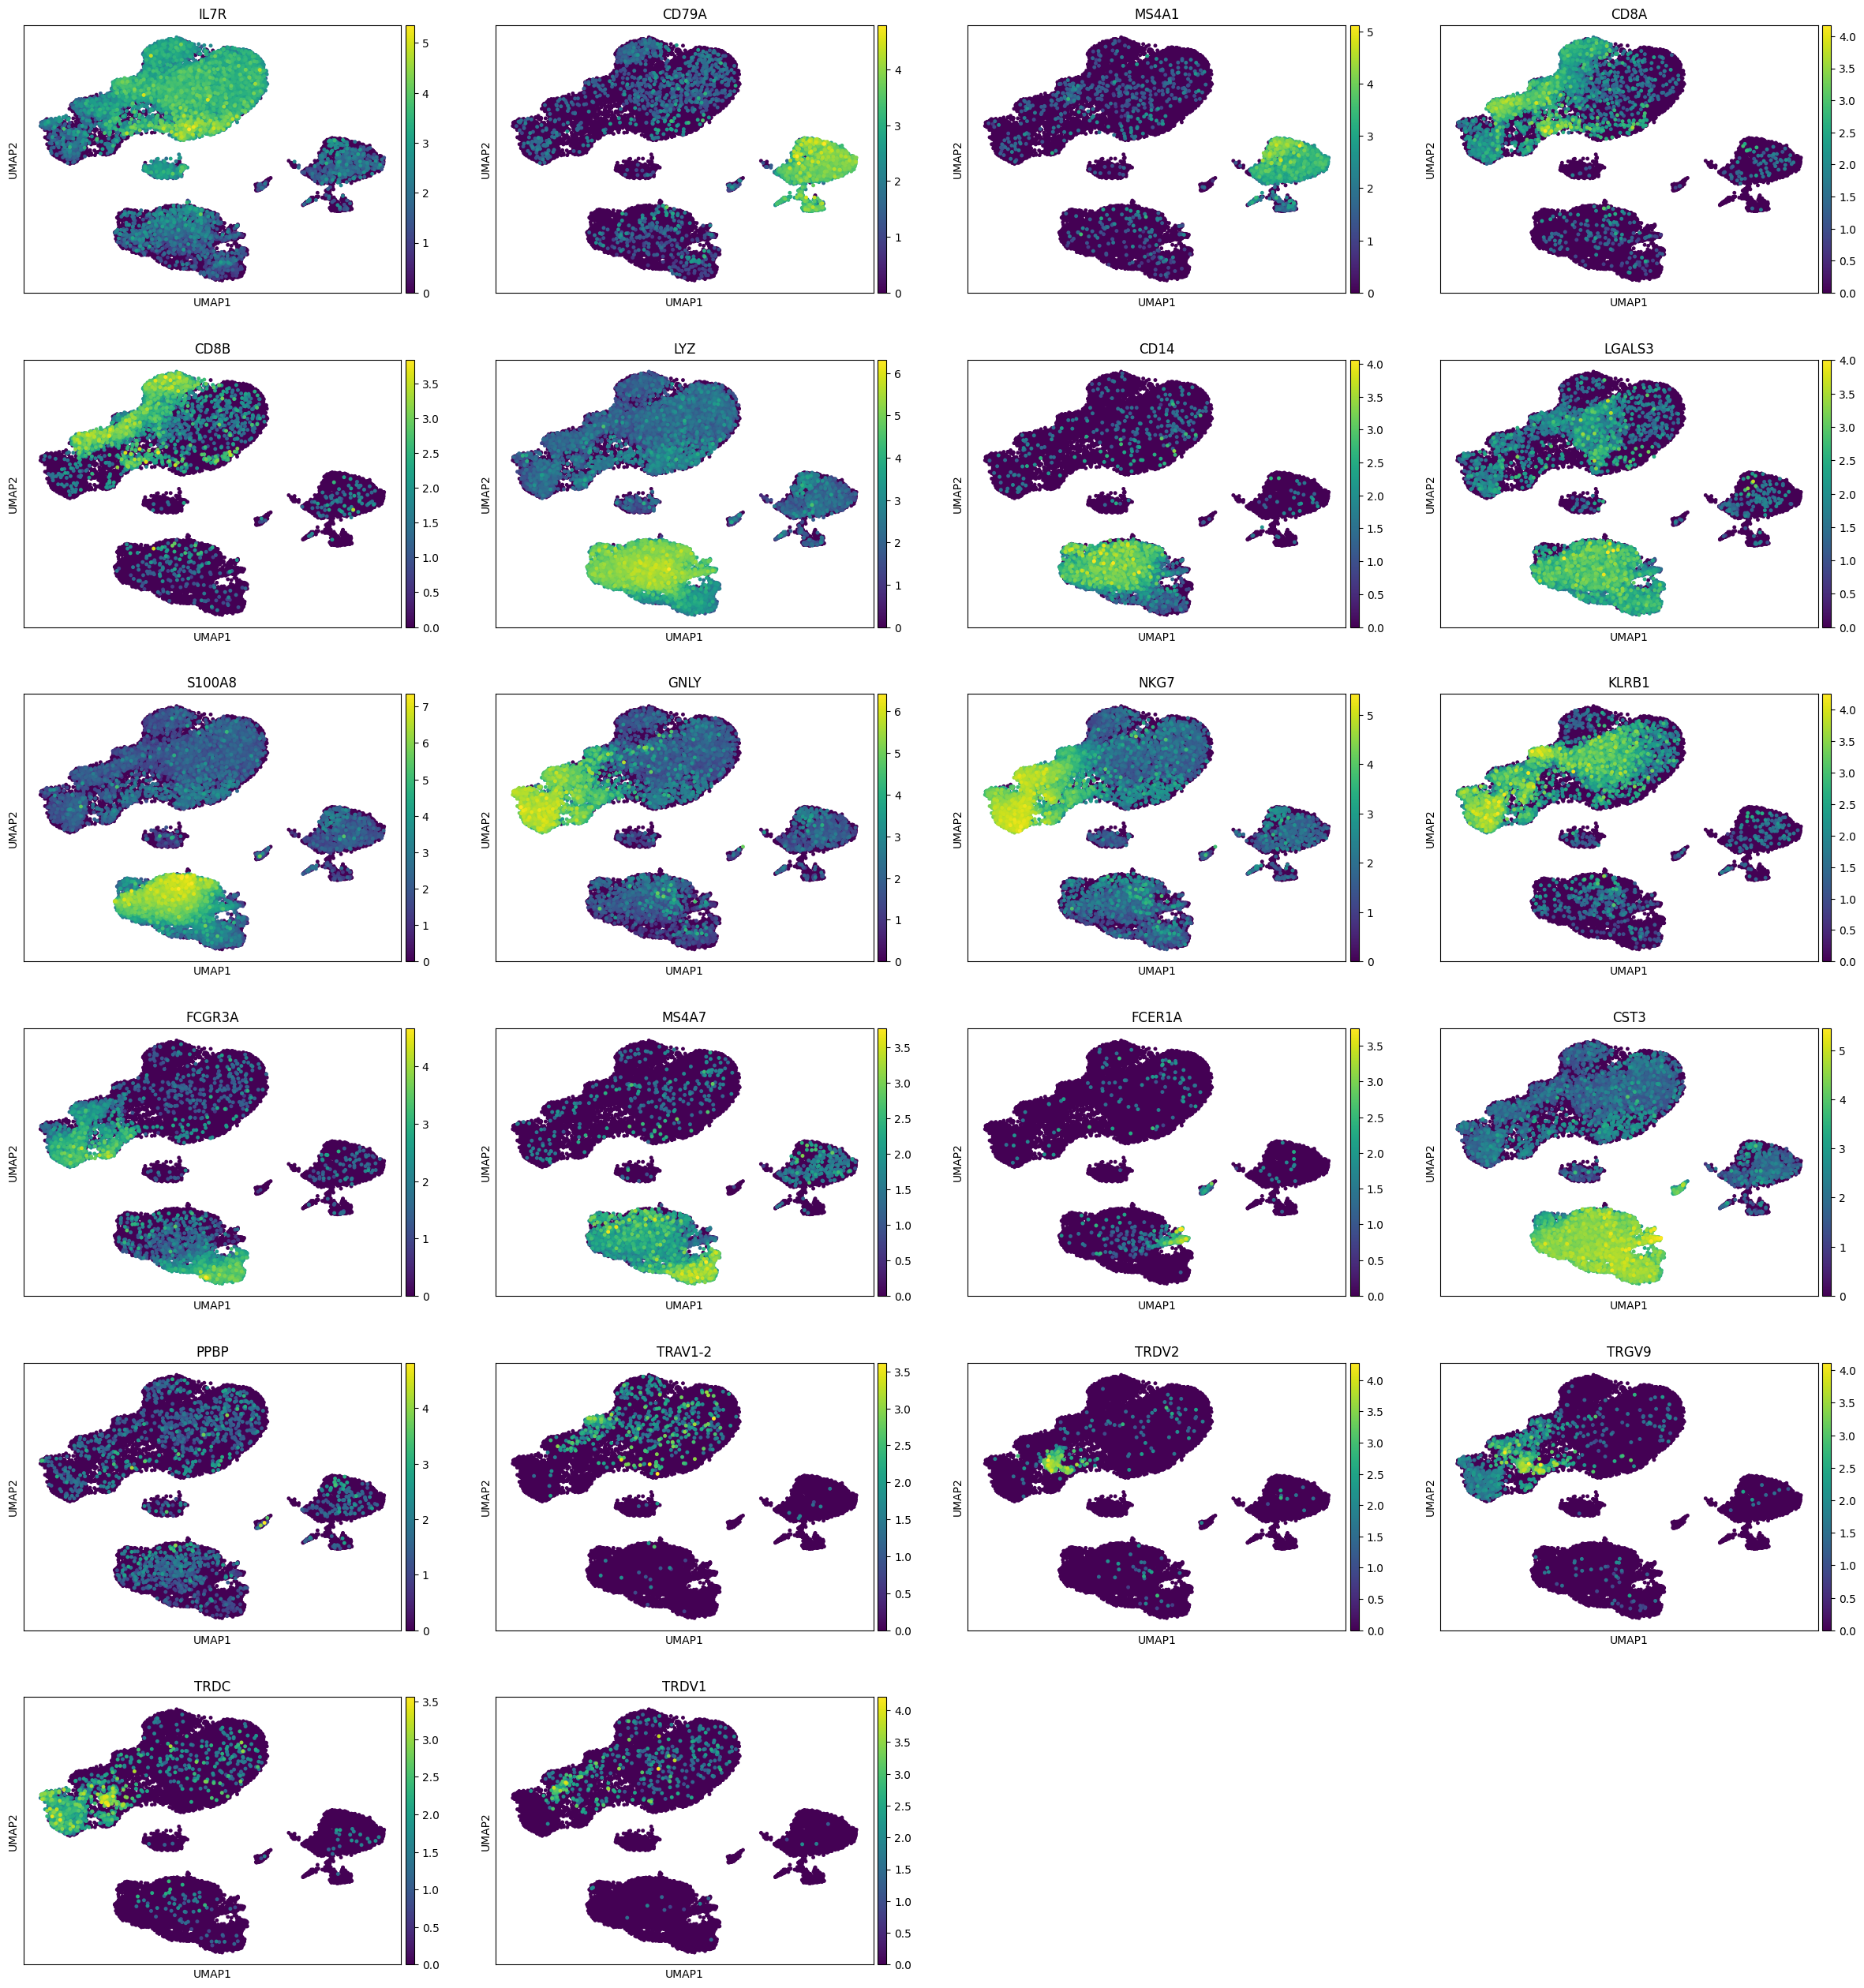

In [47]:
sc.pl.umap(adata, color=markers, s=50)

In [53]:
mappings = {
    '0':'CD4+ T',
    '9':'Mono',
    '2':'CD4+ T',
    '4':'CD4+ T',
    '14': 'Mono',
    '7':'MAIT',
    '1':'Mono',
    '11':'Mono',
    '19':'Mono',
    '18':'DC',
    '5':'NK',
    '3':'B',
    '21':'B',
    '6':'CD4+ T',
    '10':'CD8+ T',
    '16':'Gamma Delta T',
    '13':'CD4+ T',
    '22':'CD4+ T',
    '8':'CD8+ T',
    '17':'NK',
    '20':'Megakaryocyte?',
    '15':'??',
    '12':'??'}

In [55]:
adata.obs['leiden']

GN21-SCG1_AAACCTGAGAACAACT-1     9
GN21-SCG1_AAACCTGAGAATGTGT-1     2
GN21-SCG1_AAACCTGAGACCTAGG-1     4
GN21-SCG1_AAACCTGAGGGTCGAT-1     0
GN21-SCG1_AAACCTGAGTACTTGC-1    14
                                ..
GN27-SCG1_TTTGTCATCAGCATGT-1     8
GN27-SCG1_TTTGTCATCCTAGGGC-1    15
GN27-SCG1_TTTGTCATCGGCATCG-1     9
GN27-SCG1_TTTGTCATCTAACGGT-1     3
GN27-SCG1_TTTGTCATCTATCCCG-1     1
Name: leiden, Length: 48518, dtype: category
Categories (23, object): ['0', '1', '2', '3', ..., '19', '20', '21', '22']

In [56]:
adata.obs['qual_ct'] = adata.obs['leiden'].apply(lambda x: mappings[x])

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


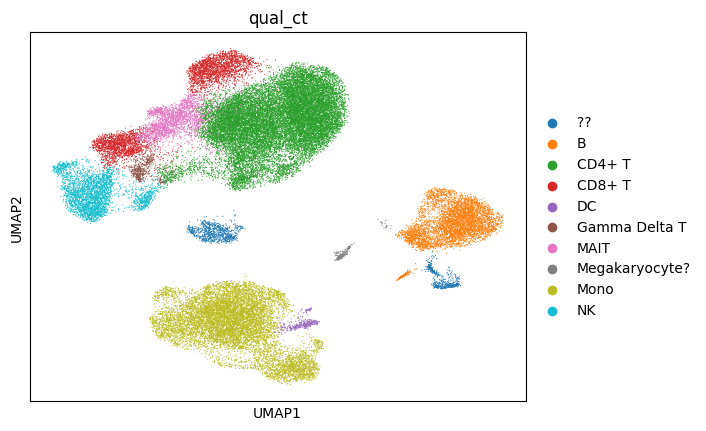

In [57]:
sc.pl.umap(adata, color='qual_ct')

In [58]:
adata.write('task3_coarse.h5ad')

In [54]:
set(adata.obs.leiden) - set(mappings.keys())

set()

In [29]:
import scanpy as sc
import pandas as pd
import numpy as np
import scipy.stats as stats

from statsmodels.stats.multitest import fdrcorrection

In [2]:
adata = sc.read('task1_rna_output_linear.h5ad')

In [4]:
sc.tl.leiden(adata)


In [5]:
labels = pd.read_csv('annotation_levels.csv')